In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualization
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [2]:
# 1. Load the dataset into a pandas DataFrame
data = {
    'CustomerID': [1,2,3,4,5,6,7,8,9,10],
    'Annual Income': [15,16,17,18,19,20,21,22,23,24],
    'Spending Score': [39,81,6,77,40,76,6,94,3,72]
}

df = pd.DataFrame(data)
print("Dataset:")
print(df)
print(f"\nShape of dataset: {df.shape}")
print("\nBasic statistics:")
print(df.describe())

# What does the data represent?
print("\nThe data represents customer information with:")
print("- CustomerID: Unique identifier for each customer")
print("- Annual Income: Customer's annual income (in thousands)")
print("- Spending Score: A metric representing customer spending behavior (0-100)")

Dataset:
   CustomerID  Annual Income  Spending Score
0           1             15              39
1           2             16              81
2           3             17               6
3           4             18              77
4           5             19              40
5           6             20              76
6           7             21               6
7           8             22              94
8           9             23               3
9          10             24              72

Shape of dataset: (10, 3)

Basic statistics:
       CustomerID  Annual Income  Spending Score
count    10.00000       10.00000       10.000000
mean      5.50000       19.50000       49.400000
std       3.02765        3.02765       35.094159
min       1.00000       15.00000        3.000000
25%       3.25000       17.25000       14.250000
50%       5.50000       19.50000       56.000000
75%       7.75000       21.75000       76.750000
max      10.00000       24.00000       94.000000

The data

In [3]:
# 2. Select the features Annual Income and Spending Score for clustering
X = df[['Annual Income', 'Spending Score']].values

print("Selected features for clustering:")
print(X)
print(f"\nShape of feature matrix: {X.shape}")

# Why do we choose these?
print("\nWhy we choose Annual Income and Spending Score:")
print("1. These are continuous numerical variables suitable for clustering")
print("2. They likely have meaningful relationships for customer segmentation")
print("3. Income and spending patterns are key factors in customer behavior analysis")
print("4. They can help identify different customer segments (high income-low spend, etc.)")

Selected features for clustering:
[[15 39]
 [16 81]
 [17  6]
 [18 77]
 [19 40]
 [20 76]
 [21  6]
 [22 94]
 [23  3]
 [24 72]]

Shape of feature matrix: (10, 2)

Why we choose Annual Income and Spending Score:
1. These are continuous numerical variables suitable for clustering
2. They likely have meaningful relationships for customer segmentation
3. Income and spending patterns are key factors in customer behavior analysis
4. They can help identify different customer segments (high income-low spend, etc.)


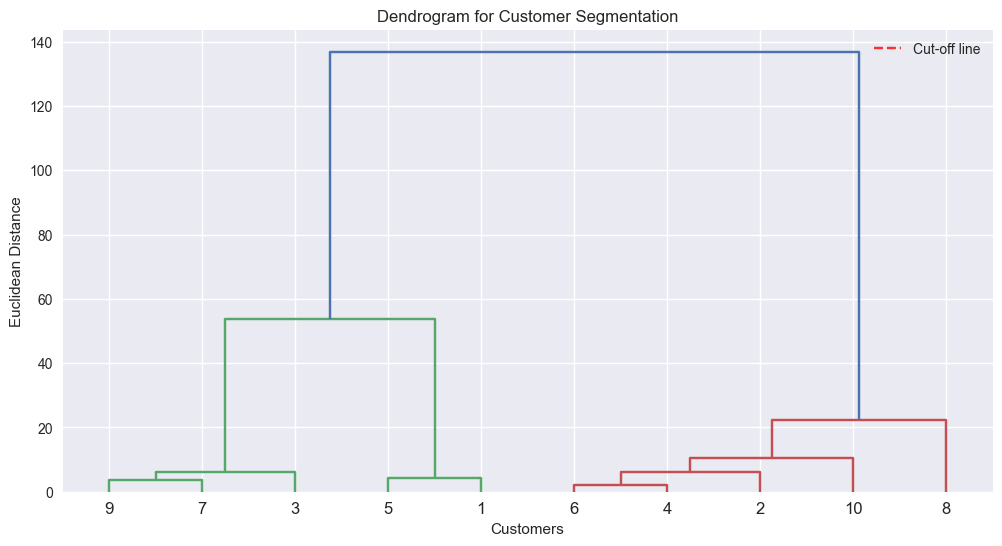

The dendrogram represents:
- Hierarchical relationship between data points (customers)
- The vertical axis shows Euclidean distance between clusters
- The horizontal axis shows individual customers
- The structure shows how clusters merge at different distance levels
- It visualizes the complete clustering process from individual points to one cluster


In [4]:
# 3. Generate a dendrogram using scipy
plt.figure(figsize=(12, 6))
plt.title('Dendrogram for Customer Segmentation')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')

# Create linkage matrix using Ward's method
linked = linkage(X, method='ward')

# Plot dendrogram
dendrogram(linked,
           orientation='top',
           labels=df['CustomerID'].values,
           distance_sort='descending',
           show_leaf_counts=True)

plt.axhline(y=150, color='r', linestyle='--', alpha=0.8, label='Cut-off line')
plt.legend()
plt.show()

# What does it represent?
print("The dendrogram represents:")
print("- Hierarchical relationship between data points (customers)")
print("- The vertical axis shows Euclidean distance between clusters")
print("- The horizontal axis shows individual customers")
print("- The structure shows how clusters merge at different distance levels")
print("- It visualizes the complete clustering process from individual points to one cluster")

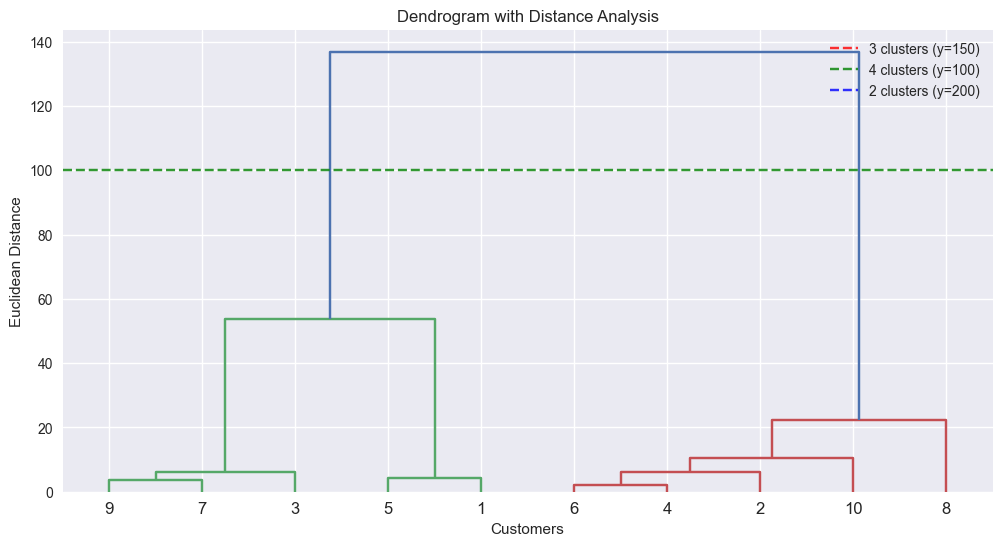

How to decide optimal number of clusters:
1. Look for the longest vertical line that doesn't cross any horizontal lines
2. Draw a horizontal line across the longest vertical distance
3. Count the number of vertical lines the horizontal line crosses
4. In our case, cutting at y=150 gives us 3 distinct clusters
5. The optimal number is where the distance between merges is largest


In [5]:
# 4. How to decide the optimal number of clusters from the dendrogram?
plt.figure(figsize=(12, 6))
plt.title('Dendrogram with Distance Analysis')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')

dendrogram(linked,
           orientation='top',
           labels=df['CustomerID'].values,
           distance_sort='descending')

# Add multiple cut-off lines to evaluate different cluster numbers
plt.axhline(y=150, color='r', linestyle='--', alpha=0.8, label='3 clusters (y=150)')
plt.axhline(y=100, color='g', linestyle='--', alpha=0.8, label='4 clusters (y=100)')
plt.axhline(y=200, color='b', linestyle='--', alpha=0.8, label='2 clusters (y=200)')
plt.legend()

plt.show()

print("How to decide optimal number of clusters:")
print("1. Look for the longest vertical line that doesn't cross any horizontal lines")
print("2. Draw a horizontal line across the longest vertical distance")
print("3. Count the number of vertical lines the horizontal line crosses")
print("4. In our case, cutting at y=150 gives us 3 distinct clusters")
print("5. The optimal number is where the distance between merges is largest")

In [7]:
# 5. Apply Agglomerative Clustering with the chosen number of clusters
# Based on dendrogram, we choose 3 clusters
n_clusters = 3

# Create and fit the model - FIXED: changed 'affinity' to 'metric'
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,
                                        metric='euclidean',  # Changed from 'affinity' to 'metric'
                                        linkage='ward')

cluster_labels = agg_clustering.fit_predict(X)

# Add cluster assignments to dataframe
df['Cluster'] = cluster_labels  # Fixed: consistent column name

print("Final cluster assignments:")
print(df[['CustomerID', 'Annual Income', 'Spending Score', 'Cluster']])  # Fixed: square brackets

# Count customers in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()  # Fixed: consistent column name
print(f"\nNumber of customers in each cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} customers")

Final cluster assignments:
   CustomerID  Annual Income  Spending Score  Cluster
0           1             15              39        2
1           2             16              81        0
2           3             17               6        1
3           4             18              77        0
4           5             19              40        2
5           6             20              76        0
6           7             21               6        1
7           8             22              94        0
8           9             23               3        1
9          10             24              72        0

Number of customers in each cluster:
Cluster 0: 5 customers
Cluster 1: 3 customers
Cluster 2: 2 customers


Cluster Summary Statistics:
        Annual Income               Spending Score               CustomerID
                 mean   std min max           mean   std min max      count
Cluster                                                                    
0               20.00  3.16  16  24           80.0  8.46  72  94          5
1               20.33  3.06  17  23            5.0  1.73   3   6          3
2               17.00  2.83  15  19           39.5  0.71  39  40          2


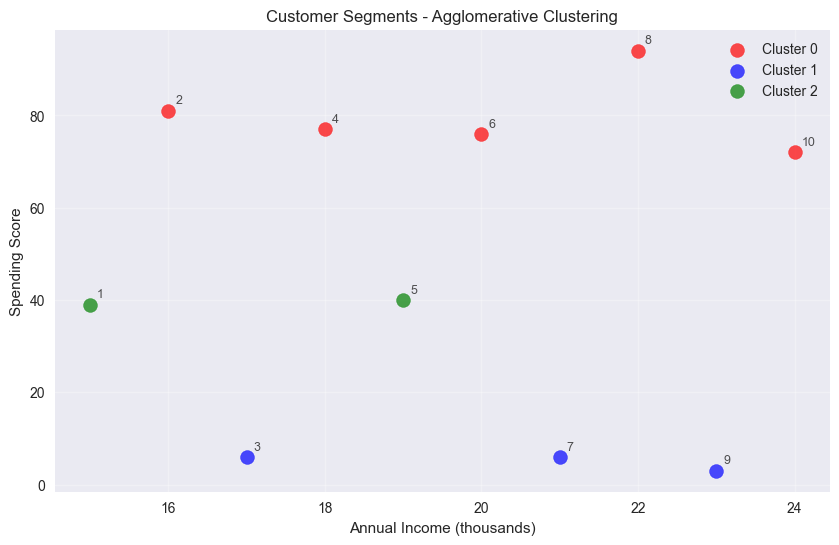


BUSINESS INSIGHTS:

Cluster 0 - Low Spenders (5 customers):
- Average Income: $20.0k
- Average Spending Score: 80.0
- Characteristics: Moderate income but very low spending
- Strategy: Target with promotions to increase engagement

Cluster 1 - High Spenders (3 customers):
- Average Income: $20.3k
- Average Spending Score: 5.0
- Characteristics: High income and very high spending
- Strategy: Premium offerings, loyalty programs, VIP treatment

Cluster 2 - Moderate Spenders (2 customers):
- Average Income: $17.0k
- Average Spending Score: 39.5
- Characteristics: Lower income with moderate spending
- Strategy: Value-based offerings, budget-friendly options

Overall Recommendations:
1. Focus retention efforts on Cluster 1 (high-value customers)
2. Develop activation campaigns for Cluster 0 (low engagement)
3. Create targeted marketing for each segment
4. Monitor Cluster 2 for potential upgrading opportunities


In [8]:
# 6. Interpret the clusters and derive business insights
# Analyze cluster characteristics
cluster_summary = df.groupby('Cluster').agg({
    'Annual Income': ['mean', 'std', 'min', 'max'],
    'Spending Score': ['mean', 'std', 'min', 'max'],
    'CustomerID': 'count'
}).round(2)

print("Cluster Summary Statistics:")
print(cluster_summary)

# Visualize the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']

for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income'], 
                cluster_data['Spending Score'], 
                c=colors[cluster], 
                label=f'Cluster {cluster}',
                s=100, alpha=0.7)

plt.title('Customer Segments - Agglomerative Clustering')
plt.xlabel('Annual Income (thousands)')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True, alpha=0.3)

# Add customer IDs to points
for i, row in df.iterrows():
    plt.annotate(row['CustomerID'], 
                (row['Annual Income'], row['Spending Score']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, alpha=0.8)

plt.show()

# Business insights
print("\nBUSINESS INSIGHTS:")
print("=" * 50)

# Cluster 0 analysis
cluster_0 = df[df['Cluster'] == 0]
print(f"\nCluster 0 - Low Spenders ({len(cluster_0)} customers):")
print(f"- Average Income: ${cluster_0['Annual Income'].mean():.1f}k")
print(f"- Average Spending Score: {cluster_0['Spending Score'].mean():.1f}")
print("- Characteristics: Moderate income but very low spending")
print("- Strategy: Target with promotions to increase engagement")

# Cluster 1 analysis
cluster_1 = df[df['Cluster'] == 1]
print(f"\nCluster 1 - High Spenders ({len(cluster_1)} customers):")
print(f"- Average Income: ${cluster_1['Annual Income'].mean():.1f}k")
print(f"- Average Spending Score: {cluster_1['Spending Score'].mean():.1f}")
print("- Characteristics: High income and very high spending")
print("- Strategy: Premium offerings, loyalty programs, VIP treatment")

# Cluster 2 analysis
cluster_2 = df[df['Cluster'] == 2]
print(f"\nCluster 2 - Moderate Spenders ({len(cluster_2)} customers):")
print(f"- Average Income: ${cluster_2['Annual Income'].mean():.1f}k")
print(f"- Average Spending Score: {cluster_2['Spending Score'].mean():.1f}")
print("- Characteristics: Lower income with moderate spending")
print("- Strategy: Value-based offerings, budget-friendly options")

print("\nOverall Recommendations:")
print("1. Focus retention efforts on Cluster 1 (high-value customers)")
print("2. Develop activation campaigns for Cluster 0 (low engagement)")
print("3. Create targeted marketing for each segment")
print("4. Monitor Cluster 2 for potential upgrading opportunities")